In [1]:
# Imports

# !pip install BeautifulSoup4
# !pip install nltk

import os
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the Data

In [3]:
# "header=0" indicates that the first line of the file contains column names
# "delimiter=\t" indicates that the fields are separated by tabs
# "quoting=3" tells Python to ignore doubled quotes

train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [4]:
train.shape

(25000, 3)

In [5]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [6]:
# Example review
print(train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

Data Cleaning and Text Preprocessing

In [7]:
# Remove HTML tags using Beautiful Soup library
example1 = BeautifulSoup(train["review"][0])

# Raw example1
print (train["review"][0])

# HTML tags removed from example1
# get_text() gives the text of the review without tags or markups
print (example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
# Removing punctuation and numbers

# Replaces all characters that are not ^, a-z, or A-Z with a space
letters_only = re.sub("[^a-zA-Z]", " ", example1.get_text())
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [9]:
# Lowercase all letters and split into individual words
# This is called tokenization

# Covert to lower case words
lower_case = letters_only.lower()

# Split into words
words = lower_case.split()

In [10]:
# # Removing stop words

# Download text datasets, including stop words
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [11]:
# Import stop words list
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [13]:
# Putting all our data cleaning tools together into a function

def review_to_words(raw_review):
  """ Function to convert a raw review to a string of words.
  The output is a single string (a preprocessed movie review). """

  # Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()

  # Remove non-letters
  letters_only = re.sub("[^a-zA-Z]", " ", review_text)

  # Convert to lower case and split into individual words
  words = letters_only.lower().split()

  # Convert stop words to a set
  # We use a set because Python searches sets much faster than searching a list
  stops = set(stopwords.words("english"))

  # Remove stop words
  meaningful_words = [w for w in words if not w in stops]

  # Join words back into one string and return results
  return (" ".join(meaningful_words))

In [14]:
# Example of function cleaning a review
clean_review = review_to_words(train["review"][0])
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [15]:
# Number of reviews based on column size of dataframe
num_reviews = train["review"].size

# Initialize empty list to hold clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list
print("Cleaning and parsing the training set movie reviews...\n")
for i in range(0, num_reviews):

  # Call function for each review and add result to list of clean reviews
  clean_train_reviews.append(review_to_words(train["review"][i]))
  if((i+1)%1000 == 0):
    print("Review %d of %d\n" % (i+1, num_reviews))

Cleaning and parsing the training set movie reviews...



<ipython-input-13-356ab8ccac99>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [16]:
# Creating bag of words

print("creating the bag of words...\n")

# CountVectorizer will create bag of words
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor= None,
                             stop_words= None,
                             max_features= 5000)

# fit_transform() fits model, learns vocabulary, and transforms training data
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with
train_data_features = train_data_features.toarray()
train_data_labels = train.iloc[:,1].values

creating the bag of words...



In [17]:
print(train_data_features.shape)

(25000, 5000)


In [18]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))

5000


In [19]:
# Set up counts of each vocabulary word
dist = np.sum(train_data_features, axis = 0)

for tag, count in zip(vocab,dist):
  print(count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

Training the Random Forest Classifer

In [20]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(train_data_features, train_data_labels, train_size = 0.9, random_state = 0)

# Set number of trees to 100 as reasonable default value
forest = RandomForestClassifier(n_estimators=100)

# Fit forest to training set using bag of words as features and sentiment
# labels as response variable
forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

Evaluate the Random Forest Classifer

In [21]:
# Accuracy Score
# Measures how many labels the model got right out of the total number of predictions
# ~ percent of predictions that were correct

print("The accuracy score is", accuracy_score(y_test,y_pred))

The accuracy score is 0.8552


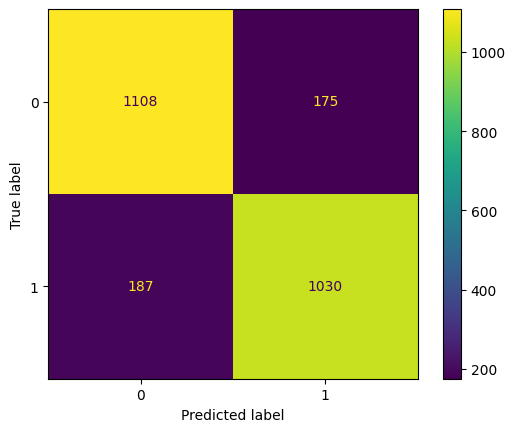

In [22]:
# Confusion matrix
# Expresses how many of a classifier’s predictions were correct, when incorrect, where classifier got confused
# Rows represent true labels, columns represent predicted labels
# Diagonal values represent number/percent of times predicted label matches true label
# Values in other cells represent instances classifier mislabeled an observation

confustion_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confustion_matrix, display_labels=forest.classes_)
disp.plot();

In [23]:
# Classification report
# Precision: Number of correctly-identified members of a class divided by all the times model predicted that class
# Recall: Number of members of a class that the classifier identified correctly divided by total number of members in that class
# F1 score: Combination of precision and recall; quick way to tell whether classifier is actually good at identifying members of a class

Precision, Recall, F1, _ = precision_recall_fscore_support(y_test,y_pred)
print("The precision score is", Precision)
print("The recall score is", Recall)
print("The F1 score is", F1)

The precision score is [0.85559846 0.85477178]
The recall score is [0.86360094 0.84634347]
The F1 score is [0.85958107 0.85053675]


Creating a Submission

In [24]:
# Read in test data
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

print (test.shape)

(25000, 2)


In [25]:
# Cleaning and parsing test set
num_reviews = len(test["review"])
clean_test_reviews = []

for i in range(0, num_reviews):
    if((i+1) % 1000 == 0):
        print ("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append(clean_review)

# Get bag of words for test set and convert to numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy results to pandas dataframe with "id" and "sentiment" column
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})

# Use pandas to write the comma-separated output file
output.to_csv("Bag_of_Words_model.csv", index=False, quoting=3)

<ipython-input-13-356ab8ccac99>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [26]:
output

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1
...,...,...
24995,"""2155_10""",1
24996,"""59_10""",1
24997,"""2531_1""",1
24998,"""7772_8""",1


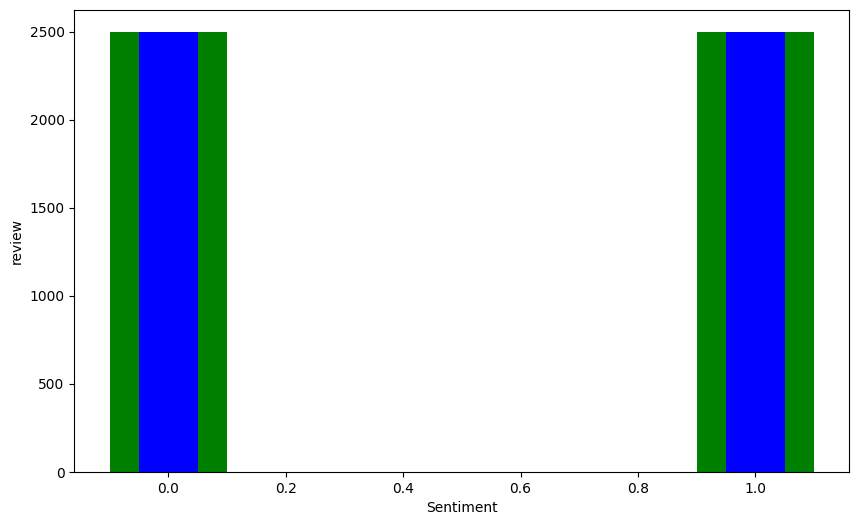

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
# plt.plot(x_ax, y_test, label = 'Observed', color = 'g', linestyle = '-')
# plt.plot(x_ax, y_pred, label = 'Predicted', color = 'b', linestyle = '--')
# plt.ylim(0,1.25)
# plt.xlim(0,50)
plt.bar(y_test, x_ax, color = 'g', width = 0.2)
plt.xlabel("Sentiment")
plt.bar(y_pred, x_ax, color = 'b', width = 0.1)
plt.ylabel("review")
plt.show()

[Text(0.603530534351145, 0.9375, 'x[3974] <= 0.5\ngini = 0.5\nsamples = 14273\nvalue = [11196, 11304]'),
 Text(0.35353053435114506, 0.8125, 'x[1498] <= 0.5\ngini = 0.5\nsamples = 13173\nvalue = [10563, 10200]'),
 Text(0.19942748091603055, 0.6875, 'x[2914] <= 0.5\ngini = 0.498\nsamples = 8847\nvalue = [6517, 7486]'),
 Text(0.12022900763358779, 0.5625, 'x[3847] <= 0.5\ngini = 0.499\nsamples = 8597\nvalue = [6440, 7176]'),
 Text(0.061068702290076333, 0.4375, 'x[2562] <= 0.5\ngini = 0.496\nsamples = 7882\nvalue = [5707, 6772]'),
 Text(0.030534351145038167, 0.3125, 'x[3034] <= 0.5\ngini = 0.499\nsamples = 6661\nvalue = [5005, 5569]'),
 Text(0.015267175572519083, 0.1875, 'x[966] <= 0.5\ngini = 0.495\nsamples = 5942\nvalue = [4264, 5168]'),
 Text(0.007633587786259542, 0.0625, '\n  (...)  \n'),
 Text(0.022900763358778626, 0.0625, '\n  (...)  \n'),
 Text(0.04580152671755725, 0.1875, 'x[667] <= 0.5\ngini = 0.456\nsamples = 719\nvalue = [741, 401]'),
 Text(0.03816793893129771, 0.0625, '\n  (...) 

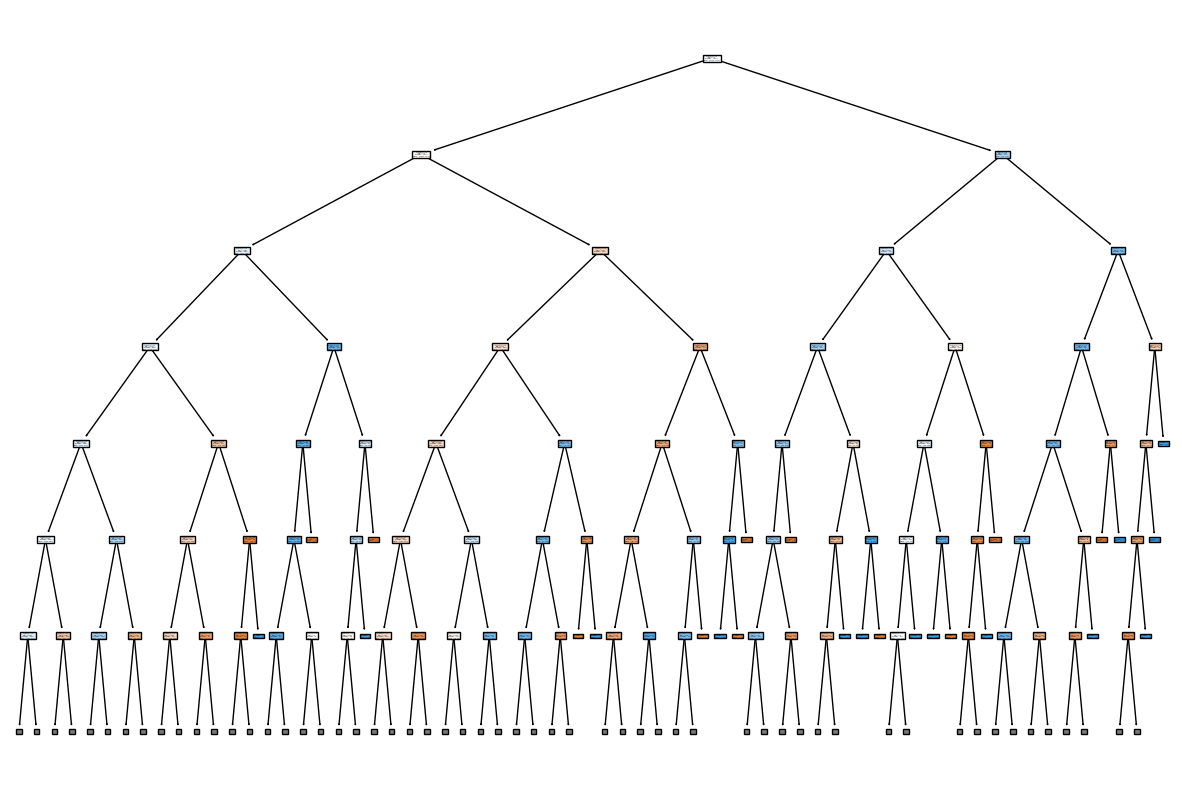

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(forest.estimators_[1], max_depth=6,filled=True)

Model Accuracy: 0.8552


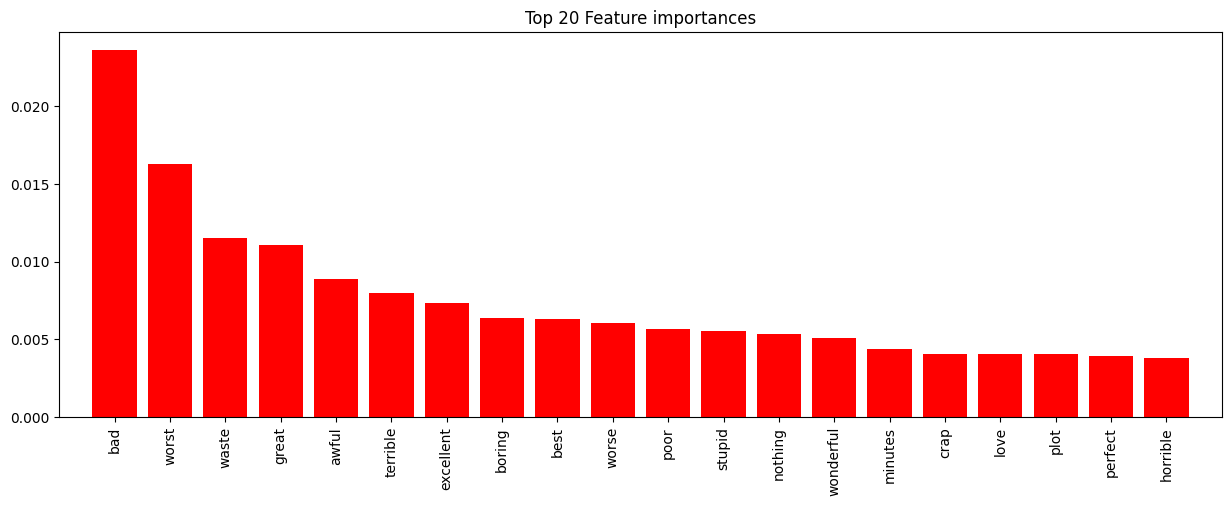

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

print('Model Accuracy:', accuracy_score(y_test, y_pred))

# Top N feature importance
N = 20
importances = forest.feature_importances_
top_indices = np.argsort(importances)[::-1][:N]
top_importances = importances[top_indices]
feature_names = vectorizer.get_feature_names_out()
top_features = [feature_names[i] for i in top_indices]

plt.figure(figsize=(15, 5))
plt.title("Top 20 Feature importances")
plt.bar(range(N), top_importances, color="r", align="center")
plt.xticks(range(N), top_features, rotation=90)
plt.xlim([-1, N])
plt.show()



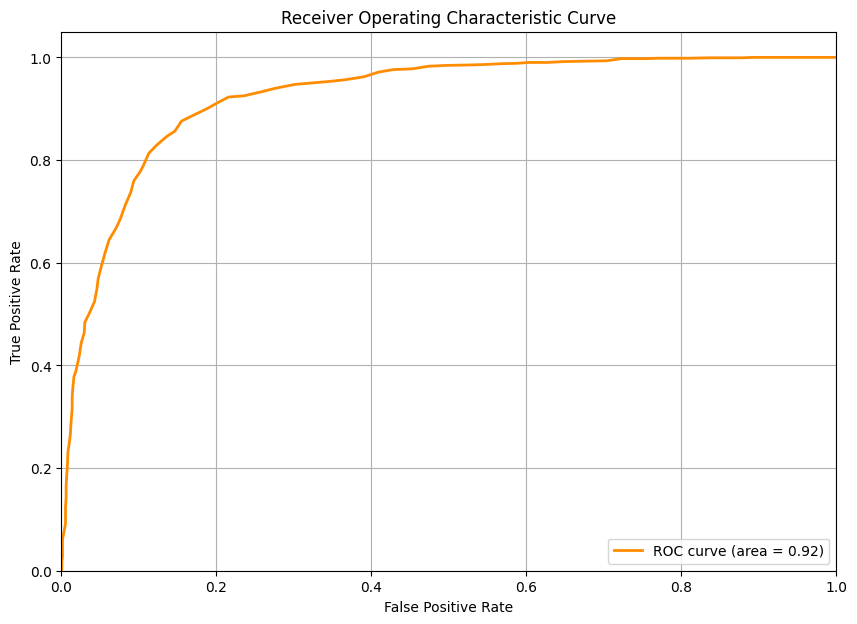

In [30]:
# ROC Curve
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = %0.2f)" % auc_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
